### Optimizing the advertisement campaign of a luxury SUV using CTR( Click Through Rate) as a metric

In [1]:
# Importing the dataset
dataset = read.csv('Ads_CTR_Optimisation.csv')

In [2]:
head(dataset)

Ad.1,Ad.2,Ad.3,Ad.4,Ad.5,Ad.6,Ad.7,Ad.8,Ad.9,Ad.10
1,0,0,0,1,0,0,0,1,0
0,0,0,0,0,0,0,0,1,0
0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,1,0,0
0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0


There are 10 different versions of an advertisement and the user gets exposed to all these versions. 1 indicates the user has clicked on that particular advertisement while 0 indicates no click.

In [3]:
# Implementing Thompson Sampling
N = 10000
d = 10
ads_selected = integer(0)
numbers_of_rewards_1 = integer(d)
numbers_of_rewards_0 = integer(d)
total_reward = 0
for (n in 1:N) {
  ad = 0
  max_random = 0
  for (i in 1:d) {
    random_beta = rbeta(n = 1,
                        shape1 = numbers_of_rewards_1[i] + 1,
                        shape2 = numbers_of_rewards_0[i] + 1)
    if (random_beta > max_random) {
      max_random = random_beta
      ad = i
    }
  }
  ads_selected = append(ads_selected, ad)
  reward = dataset[n, ad]
  if (reward == 1) {
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  } else {
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
  }
  total_reward = total_reward + reward
}

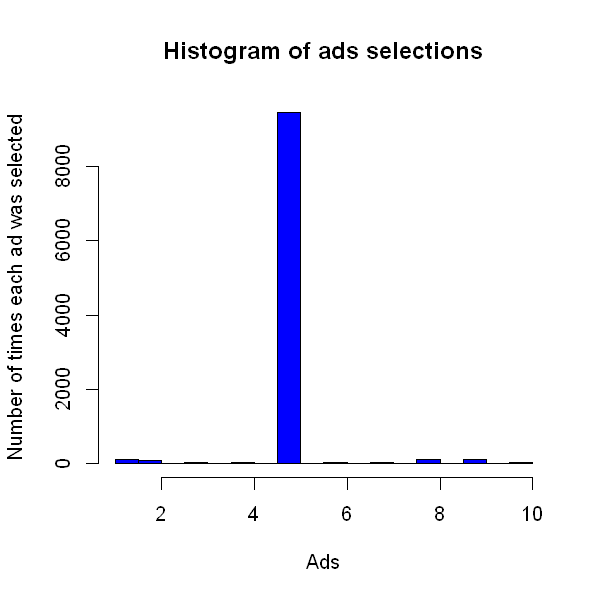

In [4]:
# Visualising the results
options(repr.plot.width=5, repr.plot.height=5)
hist(ads_selected,
     col = 'blue',
     main = 'Histogram of ads selections',
     xlab = 'Ads',
     ylab = 'Number of times each ad was selected')

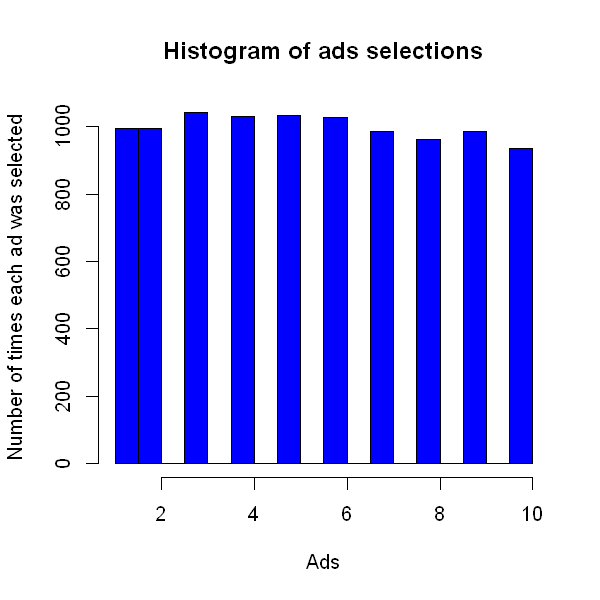

In [5]:
# Implementing Random Selection
N = 10000
d = 10
ads_selected = integer(0)
total_reward = 0
for (n in 1:N) {
  ad = sample(1:10, 1)
  ads_selected = append(ads_selected, ad)
  reward = dataset[n, ad]
  total_reward = total_reward + reward
}

# Visualising the results
hist(ads_selected,
     col = 'blue',
     main = 'Histogram of ads selections',
     xlab = 'Ads',
     ylab = 'Number of times each ad was selected')

The random curve gives a uniform prediction for each advertisement. The advertisement number 5 on the otherhand clearly dominates the number of times it is selected when compared to other advertisements as viewed from the graph of UCB.

It can also be seen Thompson Sampling outperforms Upper Confidence Bound.

In [6]:
numbers_of_rewards_1

[1]   15    7    1    0 2546    1    1   16   14    0

In [7]:
numbers_of_rewards_0

[1]   94   62   31   24 6917   31   31   94   90   25